In [20]:
from sklearn.model_selection import train_test_split # 데이터 분리 (train/test)
from sklearn.tree import DecisionTreeClassifier # 의사결정나무
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트
from sklearn import svm # SVM
from sklearn.linear_model import SGDClassifier # SGD
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀
from sklearn.metrics import classification_report # 결과 요약
from sklearn.metrics import accuracy_score # 정확성
from sklearn.metrics import recall_score # 재현율

### 손글씨 분류 (0~9)

##### 데이터 준비 및 이해

In [21]:
from sklearn.datasets import load_digits

digits 구성: ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
feature shape: (1797, 64)
feature 구성: 8x8 pixels
target 구성: [0 1 2 3 4 5 6 7 8 9]
-----------------------------------------
미리보기


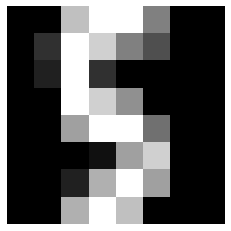

label: 5


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits() # 데이터 로딩
digits_data = digits.data # 데이터 feature 변수에 담아 저장
digits_label = digits.target # 데이터 label(target) 변수에 담아 저장

# 데이터 세부사항
print("digits 구성:", dir(digits))
print("feature shape:", digits_data.shape)
print("feature 구성: 8x8 pixels")
print("target 구성:", digits.target_names)
print("-----------------------------------------")
print("미리보기")
plt.imshow(digits.data[102].reshape(8, 8), cmap = 'gray')
plt.axis('off')
plt.show()
print("label:", digits_label[102])

In [23]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

##### 데이터 분리 (학습용 / 시험용)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size = 0.2, random_state = 24)

##### 다양한 모델 실습

In [27]:
# 의사결정나무
decision_tree = DecisionTreeClassifier(random_state = 48)
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)


# 랜덤포레스트
random_forest = RandomForestClassifier(random_state = 25)
random_forest.fit(x_train, y_train)
y_pred_random_forest = random_forest.predict(x_test)


# SVM
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)


# SGD
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred_sgd = sgd_model.predict(x_test)


# 로지스틱 회귀
logistic_regression = LogisticRegression(solver = 'lbfgs', max_iter = 3000)
logistic_regression.fit(x_train, y_train)
y_pred_logistic_regression = logistic_regression.predict(x_test)

##### 다양한 모델 결과 평가

In [29]:
# 0~9 각 요소가 모두 동일한 중요도를 가지므로 별도의 우선 순위가 없음
# 따라서, test accuracy를 기준으로 모델의 성능을 평가
print("모델 성능 평가 - Accuracy\n")
print("1. SVM:", round(accuracy_score(y_test, y_pred_svm), 3))
print("2. 로지스틱 회귀:", round(accuracy_score(y_test, y_pred_logistic_regression), 3))
print("3. 랜덤포레스트:", round(accuracy_score(y_test, y_pred_random_forest), 3))
print("4. SGD:", round(accuracy_score(y_test, y_pred_sgd), 3))
print("5. 의사결정나무:", round(accuracy_score(y_test, y_pred_decision_tree), 3))
print("-----------------------------------------------------")
print("\n결과 세부사항")
print("\nSVM (Support Vector Machine)")
print(classification_report(y_test, y_pred_svm))
print("\n로지스틱 회귀")
print(classification_report(y_test, y_pred_logistic_regression))
print("\n랜덤포레스트")
print(classification_report(y_test, y_pred_random_forest))
print("\nSGD (Stochastic Gradient Descent Classifier)")
print(classification_report(y_test, y_pred_sgd))
print("\n의사결정나무")
print(classification_report(y_test, y_pred_decision_tree))

모델 성능 평가 - Accuracy

1. SVM: 0.986
2. 로지스틱 회귀: 0.978
3. 랜덤포레스트: 0.978
4. SGD: 0.942
5. 의사결정나무: 0.833
-----------------------------------------------------

결과 세부사항

SVM (Support Vector Machine)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        45
           4       1.00      0.97      0.99        37
           5       0.92      1.00      0.96        33
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        26
           8       0.96      0.96      0.96        27
           9       1.00      0.98      0.99        43

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


로지스틱 회귀
              precision    recall  f1-

### 와인 종류 분류

##### 데이터 준비 및 이해

In [30]:
from sklearn.datasets import load_wine

In [31]:
wine = load_wine() # 데이터 로딩
wine_data = wine.data # 데이터 feature 변수에 담아 저장
wine_label = wine.target # 데이터 label(target) 변수에 담아 저장

# 데이터 세부사항
print("wine 구성:", dir(digits))
print("feature shape:", wine_data.shape)
print("feature 구성:", wine.feature_names)
print("target 구성:", wine.target_names)
print("-----------------------------------------")
print("미리보기")
print("feature:", wine_data[102])
print("label:", wine_label[102])

wine 구성: ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
feature shape: (178, 13)
feature 구성: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target 구성: ['class_0' 'class_1' 'class_2']
-----------------------------------------
미리보기
feature: [1.234e+01 2.450e+00 2.460e+00 2.100e+01 9.800e+01 2.560e+00 2.110e+00
 3.400e-01 1.310e+00 2.800e+00 8.000e-01 3.380e+00 4.380e+02]
label: 1


In [32]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

##### 데이터 분리 (학습용 / 시험용)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size = 0.2, random_state = 14)

##### 다양한 모델 실습

In [34]:
# 의사결정나무
decision_tree = DecisionTreeClassifier(random_state = 18)
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)


# 랜덤포레스트
random_forest = RandomForestClassifier(random_state = 41)
random_forest.fit(x_train, y_train)
y_pred_random_forest = random_forest.predict(x_test)


# SVM
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)


# SGD
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred_sgd = sgd_model.predict(x_test)


# 로지스틱 회귀
logistic_regression = LogisticRegression(solver = 'lbfgs', max_iter = 3000)
logistic_regression.fit(x_train, y_train)
y_pred_logistic_regression = logistic_regression.predict(x_test)

##### 다양한 모델 결과 평가

In [36]:
# 와인의 세 종류가 모두 동일한 중요도를 가지므로 별도의 우선 순위가 없음
# 따라서, test accuracy를 기준으로 모델의 성능을 평가
print("모델 성능 평가 - Accuracy\n")
print("1. 랜덤포레스트:", round(accuracy_score(y_test, y_pred_random_forest), 3))
print("2. 로지스틱 회귀:", round(accuracy_score(y_test, y_pred_logistic_regression), 3))
print("3. 의사결정나무:", round(accuracy_score(y_test, y_pred_decision_tree), 3))
print("4. SVM:", round(accuracy_score(y_test, y_pred_svm), 3))
print("5. SGD:", round(accuracy_score(y_test, y_pred_sgd), 3))
print("-----------------------------------------------------")
print("\n결과 세부사항")
print("\n랜덤포레스트")
print(classification_report(y_test, y_pred_random_forest))
print("\n로지스틱 회귀")
print(classification_report(y_test, y_pred_logistic_regression))
print("\n의사결정나무")
print(classification_report(y_test, y_pred_decision_tree))
print("\nSVM (Support Vector Machine)")
print(classification_report(y_test, y_pred_svm))
print("\nSGD (Stochastic Gradient Descent Classifier)")
print(classification_report(y_test, y_pred_sgd))

모델 성능 평가 - Accuracy

1. 랜덤포레스트: 1.0
2. 로지스틱 회귀: 0.944
3. 의사결정나무: 0.917
4. SVM: 0.778
5. SGD: 0.75
-----------------------------------------------------

결과 세부사항

랜덤포레스트
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


로지스틱 회귀
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.94      0.94      0.94        16
           2       1.00      0.83      0.91         6

    accuracy                           0.94        36
   macro avg       0.96      0.92      0.94        36
weighted avg       0.95      0.94      0.94        36


의사결정나무
              precision    recall  f1-score   suppor

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 유방암 진단 (악성, 양성)

##### 데이터 준비 및 이해

In [37]:
from sklearn.datasets import load_breast_cancer

In [38]:
breast_cancer = load_breast_cancer() # 데이터 로딩
breast_cancer_data = breast_cancer.data # 데이터 feature 변수에 담아 저장
breast_cancer_label = breast_cancer.target # 데이터 label(target) 변수에 담아 저장

# 데이터 세부사항
print("breast cancer 구성:", dir(breast_cancer))
print("feature shape:", breast_cancer_data.shape)
print("feature 구성:", breast_cancer.feature_names)
print("target 구성:", breast_cancer.target_names)
print("-----------------------------------------")
print("미리보기")
print("feature:", breast_cancer_data[102])
print("label:", breast_cancer_label[102])

breast cancer 구성: ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
feature shape: (569, 30)
feature 구성: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target 구성: ['malignant' 'benign']
-----------------------------------------
미리보기
feature: [1.218e+01 2.052e+01 7.722e+01 4.587e+02 8.013e-02 4.038e-02 2.383e-02
 1.770e-02 1.739e-01 5.677e-02 1.924e-01 1.571e+00 1.183e+00 1.468e+01
 5.080e-03 6.098e-03 1.069e-02 6.797e-03 1.447e-02 1.532e-03 

In [40]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

##### 데이터 분리 (학습용 / 시험용)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_label, test_size = 0.2, random_state = 13)

In [47]:
# 의사결정나무
decision_tree = DecisionTreeClassifier(random_state = 36)
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)


# 랜덤포레스트
random_forest = RandomForestClassifier(random_state = 11)
random_forest.fit(x_train, y_train)
y_pred_random_forest = random_forest.predict(x_test)


# SVM
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)


# SGD
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred_sgd = sgd_model.predict(x_test)


# 로지스틱 회귀
logistic_regression = LogisticRegression(solver = 'lbfgs', max_iter = 3000)
logistic_regression.fit(x_train, y_train)
y_pred_logistic_regression = logistic_regression.predict(x_test)

In [50]:
 # 악성 환자를 양성 환자로 판단하는 것은 치명적이므로 FN의 최소화가 최우선
 # 따라서, 재현율(recall)을 기준으로 평가 [positve = 악성, negative = 양성]
print("모델 성능 평가 - Recall\n")
print("1. 로지스틱 회귀:", round(recall_score(y_test, y_pred_logistic_regression, labels = [1, 0]), 3))
print("2. SVM:", round(recall_score(y_test, y_pred_svm, labels = [1, 0]), 3))
print("3. 랜덤포레스트:", round(recall_score(y_test, y_pred_random_forest, labels = [1, 0]), 3))
print("4. 의사결정나무:", round(recall_score(y_test, y_pred_decision_tree, labels = [1, 0]), 3))
print("5. SGD:", round(recall_score(y_test, y_pred_sgd, labels = [1, 0]), 3))
print("-----------------------------------------------------")
print("\n결과 세부사항")
print("\n로지스틱 회귀")
print(classification_report(y_test, y_pred_logistic_regression))
print("\nSVM (Support Vector Machine)")
print(classification_report(y_test, y_pred_svm))
print("\n랜덤포레스트")
print(classification_report(y_test, y_pred_random_forest))
print("\n의사결정나무")
print(classification_report(y_test, y_pred_decision_tree))
print("\nSGD (Stochastic Gradient Descent Classifier)")
print(classification_report(y_test, y_pred_sgd))

모델 성능 평가 - Recall

1. 로지스틱 회귀: 0.949
2. SVM: 0.936
3. 랜덤포레스트: 0.897
4. 의사결정나무: 0.859
5. SGD: 0.551
-----------------------------------------------------

결과 세부사항

로지스틱 회귀
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.94      0.95      0.94        78

    accuracy                           0.92       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114


SVM (Support Vector Machine)
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.89      0.94      0.91        78

    accuracy                           0.88       114
   macro avg       0.87      0.84      0.85       114
weighted avg       0.88      0.88      0.88       114


랜덤포레스트
              precision    recall  f1-score   support

           0       0.81      0.97      0.89        36
           1       0.99     

# 회고

## 모델 성능 평가

- 손글씨 분류 (0~9)<br/>
<br/>
데이터가 고르게 있는가?<br/>
모델 종류별 데이터 분석 결과 세부사항을 보면 데이터가 얼마나 치중되어 있는 지 알 수 있다.<br/>
0부터 9까지의 데이터는 각각 대략 35개이며, 데이터가 가장 작은 요소가 26개의 데이터로 데이터가 가장 많은 요소가 45개의 데이터로 구성되어 있다.<br/>
나는 이러한 특정 데이터가 특별히 치중되어 있지 않다고 판단, 즉 데이터가 고르게 있다고 보았다.<br/>
<br/>
우선순위는!<br/>
만약 0을 1로 보는 것이 1을 0으로 보는 것보다 심각한 결과를 초래한다면 0을 1로 잘못 보는 것에 우선 순위를 둘 것이다.<br/>
하지만 이 모델의 쓰임이 명확하지 않으므로 오직 정확성(test accuracy)을 기준으로 모델의 성능을 평가한다.<br/>
<br/>

- 와인 종류 분류<br/>
<br/>
데이터는 고르게 있는가?<br/>
와인 종류는 세가지 0, 1, 2가 있다.<br/>
와인 종류를 분류하는 분석 데이터는 2가 0과 1의 데이터 개수의 절반 이하로 꽤나 적은 것으로 평가된다.<br/>
즉, 데이터가 고르게 있지 않다고 보았다.<br/>
이런 데이터 분포의 문제점은 만약 모델이 2를 아예 배제하고 0과 1만 판별할 수 있다고 할 지라도 꽤나 정확도가 높게 평가될 수 있다는 것이다.<br/>
하지만 세부사항의 precision과 recall, accuracy 세 지표를 비교하면 대체로 precision과 recall이 높은 모델이 accuracy도 높은 것으로 보인다.<br/>
이 분석 결과의 쓰임이 분석 단계에서 명확하지 않으므로 데이터의 분포가 고르지 않은 것은 성능 평가에 영향을 주지 않는 것으로 간주한다.<br/>
<br/>
우선 순위는!<br/>
이전 손글씨 분류와 마찬가지로 0, 1, 2 중 특별한 우선 순위가 없는 것으로 보인다.<br/>
만약 1이 인기 모델이므로 1을 잘못 판단하는 것이 더 많은 사용자에게 혼란을 준다면, 1을 우선 순위로 모델의 성능을 평가해야할 것이다.<br/>
하지만 이 모델의 쓰임이 명확하지 않으므로 오직 정확성(test accuracy)을 기준으로 모델의 성능을 평가한다.<br/>
<br/>

- 유방암 진단 (악성, 양성)<br/>
<br/>
데이터는 고르게 있는가?<br/>
위 데이터 정보를 확인하면 0이 악성(malignant)이고, 1이 양성(benign)이다.<br/>
악성 종양의 데이터는 양성 종양의 데이터보다 적다.<br/>
<br/>
우선 순위는!<br/>
이전 분석과 다르게 유방암 진단의 경우 악성 종양을 양성 종양으로 판단하는 것은 환자에게 치명적일 것이라는 예상이 가능하다.<br/>
따라서 악성 종양을 양성 종양으로 판단하는 오류를 최소화하는 모델을 우선 순위에 둘 필요가 있다.<br/>
재현율(recall)은 실제 악성 종양 대비 악성 종양을 잘 판단한 비율이다.<br/>
따라서 이 분석에서 모델 성능은 재현율을 기준으로 평가한다.<br/>
<br/>

이러한 분석을 토대로 모델의 성능을 평가하고 우선 순위를 두었지만, 사실은 모델의 성능 평가 기준으로 삼은 정확성(test accuracy)과 재현율(recall)은 random-state에 따라 변하는 것을 확인하였다.<br/>
따라서 실무를 할 때는 더 많은 데이터를 토대로, 훈련용 데이터(train data)와 검증용 데이터(validation data)를 여러번 나누어 학습하고, 모델의 성능을 평가하는 교차검증 기법을 사용해야 할 것이다.<br/>
<br/>

## 학습 내용

- Confused Matrix (오차 행렬)<br/>
<br/>
학습 이진 분류 모델을 평가하는 지표이다.<br/>
<br/>
다음 네가지 유형이 있다.<br/>
TP : 예측이 맞다, Positve 예측, Positive 사실<br/>
TN : 예측이 맞다, Negative 예측, Negative 사실<br/>
FP : 예측이 틀리다, Positve 예측, Negative 사실<br/>
FN : 예측이 틀리다, Negative 예측, Positve 사실<br/>
<br/>
유형은 두개의 알파벳 형식이다.<br/>
앞 글자(T or F)는 예측이 맞았는 지 틀렸는 지 여부이다. T는 예측이 맞은 것이고, F는 예측이 틀린 것이다.<br/>
뒷 글자(P or N)은 예측한 내용이다. P는 Positive로 예측한 것이고, N은 Negative로 예측한 것이다.<br/>
<br/>
대개 Positive는 1로, Negative는 0으로 학습한다. 이는 True / False 개념과도 상통하기 때문에 이해가 용이하지만 실제 분석 환경에서는 헷갈릴 수 있다.<br/>
왜냐하면 항상 1이 Positive이고, 0이 Negative이지 않기 때문이다. 상황에 따라 1은 Negative 0은 Positive로, 양성은 Negative 음성은 Positive로 여길 수도 있다.<br/>
따라서 오차행렬을 사용할 때는 Positive와 Negative 기준이 절대적이지 않다는 점에 유의해야 한다.<br/>
skleran은 label을 이용하여 어떤 관점에 볼 건 지 정해줄 수 있으니 명확하게 하는 편이 좋겠다.<br/>
<br/>
[Scikit-learn confusion matrix, stackoverflow, (2022.01.06)](https://stackoverflow.com/questions/35178590/scikit-learn-confusion-matrix)
<br/>

- Convergence warning<br/>
<br/>
Scikit learn 업데이트 이후, 로지스틱 회귀를 사용할 경우 이와 같은 경고 메시지가 나온다.<br/>
기본 최대치인 100번 반복 수행했지만 결과물을 도출하지 못했다는 뜻으로 반복 회수 최대치를 늘려주면 해결할 수 있다.<br/>
아래 글을 참조하였고, 팀원의 도움을 받았다.<br/>
<br/>
[Q. logistic regression에서 convergence warning, Inflearn, (2022.01.06)](https://www.inflearn.com/questions/62388)
<br/>
<br/>
```
model_name = LogisticRegression() # 이전 (max_iter = 100)
model_name = LogisticRegression(solver = 'lbfgs', max_iter = 3000) # 변경 후
```
<br/>

#### 사족

<br/>

*두번째 데이터 분석 프로젝트였다.* <br/>
*여러 모델을 학습해보고, 도출한 결과를 바탕으로 모델을 평가하는 유익한 경험이었다.* <br/>
*scikit learn을 사용하니 코드 자체는 어렵지 않았다.* <br/>
*그래서 이번 프로젝트를 진행할 땐, 보는 사람 입장에서 더 쉽게 이해할 수 있도록 코드와 주석을 작성하는데 초점을 두었다.* <br/>
*또한 데이터에 대한 설명부, 모델링 결과부를 한눈에 보이도록 표현하고자 했다.* <br/>
*파이썬으로 구현할 수 있는 테이블 출력도 생각을 해봤지만 scikit learn의 활용과 관련성이 떨어지는 듯해 하지 않았다.* <br/>
*파이썬에 더 익숙해지면 더 깔끔하게 출력하도록 해야겠다.* <br/>
<br/>
*팀원과 함께 scikit learn에 대해 토론하면서 이런 논제가 나왔다.* <br/>
*좋은 API를 잘 활용하는 게 좋다! vs 원리를 이해해야 한다!* <br/>
*전자의 의견은 이렇다. 급속도로 발전하는 요즘, 모든 신기술을 깊이 이해할 수는 없다. 이를 활용하는 것 또한 스킬, 새로 나오는 것을 잘 받아들이고 효율적으로 사용하자.* <br/>
*후자의 의견은 이렇다. 이번 기회에 좋은 라이브러리를 알게 되고 쉽게 사용했지만, 충분한 학습 뒤에는 직접 하나하나 구현해 볼 필요가 있다. 사용 뿐 아니라 깊이 있는 이해가 필요하다.* <br/>
*모두 일리가 있어 고민을 하고 있던 차에 퍼실님께서 첨언을 주셨다.* <br/>
*처음 공부를 시작할 때 이런 라이브러리를 사용해서 경험을 쌓는 것은 좋다. 하지만 차후에 보다 효율적으로 상황에 최적하게 사용하려면 원리를 이해해야 한다.* <br/>
*이번 노드에서 나오는 다양한 이론들, 이런저런 글들을 독해해가며 어느정도는 이해했다고 생각한다.* <br/>
*하지만 필요한 상황에서 효율적으로 사용할 수 있으려면 깊이 있는 이해와 많은 경험이 필요할 것 같다는 생각이다.* <br/>
<br/>
*Exploration에 이어서 바로 다음 날 Fundamental 학습으로 scikit learn과 다양한 머신러닝 모델에 대해 공부했다.* <br/>
*너무나도 많은 알고리즘이 있다. 모두 기억하고 있다가 필요할 때 적절히 적용하려면 모델에 대한 복습이 더 필요할 것 같다.* <br/>